# DATA IMPORTATION

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\uju\Desktop\data iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# DATA PREPROCESSING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#reshuffle the data
data=data.sample(frac=1)

In [9]:
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
118  119            7.7           2.6            6.9           2.3   
119  120            6.0           2.2            5.0           1.5   
4      5            5.0           3.6            1.4           0.2   
3      4            4.6           3.1            1.5           0.2   
66    67            5.6           3.0            4.5           1.5   
..   ...            ...           ...            ...           ...   
26    27            5.0           3.4            1.6           0.4   
107  108            7.3           2.9            6.3           1.8   
45    46            4.8           3.0            1.4           0.3   
108  109            6.7           2.5            5.8           1.8   
106  107            4.9           2.5            4.5           1.7   

             Species  
118   Iris-virginica  
119   Iris-virginica  
4        Iris-setosa  
3        Iris-setosa  
66   Iris-versicolor  
..               ... 

# DATA VISUALIZATION

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

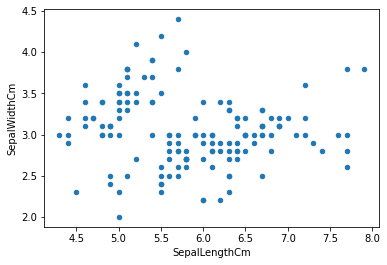

In [11]:
data.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
plt.show()

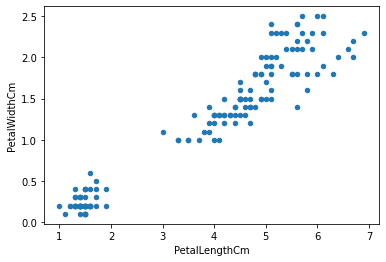

In [12]:
data.plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm')
plt.show()

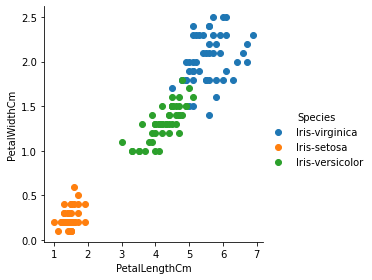

In [13]:
sb.FacetGrid(data,hue='Species',height=4).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

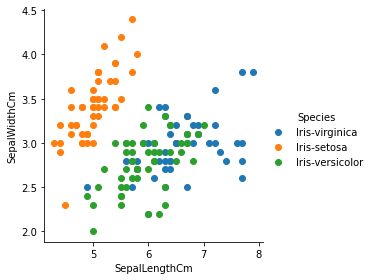

In [14]:
sb.FacetGrid(data,hue='Species',height=4).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

In [15]:
data['SepalLengthCm'].corr(data['SepalWidthCm'])

-0.10936924995064932

In [16]:
data['PetalLengthCm'].corr(data['PetalWidthCm'])

0.9627570970509662

In [22]:
data['Species']=data['Species'].map({'Iris-setosa':'A','Iris-versicolor':'B','Iris-virginica':'C'})


# DATA MODELLING

In [25]:
X=data.drop(['Id','Species'],axis=1) #independent variables
Y=data['Species'] #dependent variable

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
pred=model.predict(X_test)
print(pred)

['C' 'C' 'C' 'C' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'B' 'A' 'A' 'B' 'C' 'B' 'C'
 'C' 'C' 'B' 'B' 'A' 'A' 'B' 'B' 'C' 'C' 'A' 'B' 'A' 'A' 'A' 'B' 'C' 'A'
 'C' 'C' 'C' 'B' 'A' 'A' 'C' 'B' 'B']


In [29]:
print(Y_test)

146    C
100    C
126    C
145    C
61     B
63     B
55     B
84     B
102    C
115    C
128    C
91     B
13     A
30     A
57     B
134    C
58     B
83     B
124    C
104    C
79     B
69     B
46     A
36     A
96     B
76     B
101    C
110    C
44     A
52     B
16     A
2      A
41     A
56     B
111    C
15     A
77     B
105    C
123    C
88     B
5      A
4      A
142    C
86     B
80     B
Name: Species, dtype: object


In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
print(cm)

[[11  0  0]
 [ 0 16  2]
 [ 0  0 16]]


In [31]:
from sklearn.metrics import classification_report,accuracy_score,precision_score
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        11
           B       1.00      0.89      0.94        18
           C       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# DATA PREDICTION

In [32]:
new_data=[[4.9,3.0,1.4,0.2]]
new_pred=model.predict(new_data)

In [33]:
print(new_pred)

['A']
